<font face='serif' size=4>
<span style="line-height: 1.25;">

# HW5 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

<font face='serif' size=4>
<span style="line-height: 1.25;">

## 5.1 
如果我們已知2000年台北測站的的平均降雨量是5 mm/day， 我們想要知道2000年的平均降雨量與氣候平均是否有差異?
- 請問你的虛無假設與對立假設應該如何設定？


<font face='serif' size=4>
<span style="line-height: 1.25;">

### Answer

- **虛無假設（$\footnotesize\rm H_0$）：** 2000 年台北測站的平均降雨量與氣候平均降雨量相同 $\footnotesize\bar{X}-\mu=0$。
- **對立假設（$\footnotesize\rm H_1$）：** 2000 年台北測站的平均降雨量氣候平均降雨量不同 $\footnotesize\bar{X}-\mu\neq0$。


<font face='serif' size=4>
<span style="line-height: 1.25;">

## 5.2 
判斷近15年（1999~2013）的全球平均溫度是否顯著大於上世紀初15年 (1901~1915) 的平均溫度? 


<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Establishing Hypotheses

In this case the null hypothesis and alternative hypothesis are:

- Null Hypothesis: the global mean temperature over recent 15 years is lower than or equal to the mean temperature over early 20th century (1901-1915) $$H_0: \bar{X}_{\text{recent}} \leq \bar{X}_{\text{Early 20th Century}}$$
- Alternative Hypothesis: the the global mean temperature over recent 15 years is greater than the mean temperature over early 20th century (1901-1915) $$H_1: \bar{X}_{\text{recent}} > \bar{X}_{\text{Early 20th Century}}$$

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Processing data
In the following code we load the data, calculate the yearly mean and pick out the two assigned samples (1901-1915, 1999-2013).

In [13]:
import pandas as pd
from scipy import stats

# Load the data
data = pd.read_csv('./TS.txt', header=None, names=['Temperature'])

# Dimensions
years = 113  # Total years
months_per_year = 12  # Months in a year

# Reshape the data to have 113 rows (one for each year) and 12 columns (one for each month)
data_reshaped = data.values.reshape(years, months_per_year)

# Calculate the yearly averages
yearly_averages = data_reshaped.mean(axis=1)

# Since the data is from 1901 to 2013, create a range of years for reference
years_range = pd.date_range(start='1901', periods=years, freq='Y').year

# Create a DataFrame with the yearly averages
yearly_data = pd.DataFrame({'Year': years_range, 'AvgTemperature': yearly_averages})

# Extract the first 15 years (1901-1915) and the last 15 years (1999-2013) for comparison
early_period = yearly_data[(yearly_data['Year'] >= 1901) & (yearly_data['Year'] <= 1915)]
recent_period = yearly_data[(yearly_data['Year'] >= 1999) & (yearly_data['Year'] <= 2013)]

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Calculate mean value

In the following code we calculate the mean over the two sample. 

In [14]:
# Calculate the means for the early and recent periods
early_mean = early_period['AvgTemperature'].mean()
recent_mean = recent_period['AvgTemperature'].mean()

print(f"Early mean  (1901~1915): {early_mean :.2f} °C")
print(f"Recent mean (1999~2013): {recent_mean :.2f} °C")

Early mean  (1901~1915): 11.17 °C
Recent mean (1999~2013): 12.08 °C


<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Finding the Condition to Reject the Null Hypothesis $H_0$

First we use the t table and find the critical t value for rejection of $\footnotesize H_0$ is about 1.76. Then multiply by the standard deviation ($\footnotesize s = \frac{\sqrt{s_1^2+s_2^2}}{2}$ since the two samples are from the same population) and added to $\mu$ we find the critical value is $\footnotesize 11.17 + 0.04 = 11.21$, i.e. we reject $H_0$ if $\footnotesize\bar{X}_{\text{recent}} > 11.21$. 

In [18]:
n = 15
alpha = 0.05
df = n - 1
t_critical = stats.t.ppf(1-alpha, df)
print(f"Critical t value for rejection of H0 (one-tailed, right) is {t_critical}")
unified_std = (early_period['AvgTemperature'].var() + recent_period['AvgTemperature'].var())**0.5 /2
standard_error = unified_std / (n)**0.5
critical_value = early_mean + t_critical * standard_error
print(f"Critical value for rejection of H0 (one-tailed, right) is {critical_value}")

Critical t value for rejection of H0 (one-tailed, right) is 1.7613101357748562
Critical value for rejection of H0 (one-tailed, right) is 11.208446739690249


<font face='serif' size=4>
<span style="line-height: 1.25;">

##### Result
Since we've already known that $\footnotesize\bar{X}_{\text{recent}} = 12.08$ in last sector, we successfully reject $H_0$.

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Perform t-test and calculate p-value

We also use the function stats.ttest_ind() from scipy.stats to do the two-sample t-test and find out the P value of $\footnotesize\bar{X}_{\text{recent}}$ for double checking that the Null Hypothesis is rejected.

In [ ]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(recent_period['AvgTemperature'], early_period['AvgTemperature'],alternative='greater')

print(f"P value = {p_value}")

P value = 5.468515979584668e-20


<font face='serif' size=4>
<span style="line-height: 1.25;">

##### Result
Since p value $\footnotesize \approx 5\times10^{-20} \ll 0.05$, we can reject $\footnotesize H_0$ with highly strong evidence.

<font face='serif' size=4>
<span style="line-height: 1.25;">

### Discussion

In the beginning, only with mean values we can not tell if the recent mean temperature $\footnotesize 12.08 \text{\textdegree C}$ is significantly larger than the early 20th century's mean temperature $\footnotesize 11.17$. But with statistical methods we're able to convince readers that the temperature change is significant. With the establishment and rejection of the hypotheses we're giving proofs in a scientific way, which make our result universally understandable and more trustworthy.

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 5.3 
在大氣的研究領域中選一本期刊並討論其使用假設檢定的目的以及是否有問題

<font face='serif' size=4>
<span style="line-height: 1.25;">

P.S. Assisted by GPTs-PaperDigest

本研究 **「台北都會區午後雷陣雨週間變化」**（王世傑，指導教授：游政谷博士。於 2018 年 1 月在國立臺灣大學理學院大氣科學研究所完成）採用了氣象局與環保署地面觀測站的氣象參數資料，分析了 1999 至 2015 年間 6 月至 8 月期間，在弱綜觀環境下的週間降雨變化情況。

#### 研究假設

由於論文中未明確提出具體的假設（$H_0$與$H_1$），但根據研究方法的描述，我們可以推斷：

- **零假設（$H_0$）**:「在弱綜觀環境下，台北都會區的午後雷陣雨沒有顯著的週間變化」。
- **對立假設（$H_1$）**:「在弱綜觀環境下，台北都會區的午後雷陣雨存在顯著的週間變化」。

#### 資料使用

研究涵蓋了氣象局和環保署提供的地面觀測站資料，包括但不限於降雨量、懸浮微粒（PM10和PM2.5）濃度等。這些資料被用來分析夏季午後雷陣雨的週間變化，特別是在弱綜觀環境下的情況。

#### 統計方法與結果

透過 Z 檢定和 t 檢定，本研究分析了資料的週間變化是否具有統計上的顯著差異。結果顯示，台北盆地內的平均降雨強度在週間（特別是週三）大於週末，暗示了一種顯著的週間變化模式。此外，懸浮微粒（PM10 和 PM2.5）的分析也揭示了類似的週間變化趨勢。

#### 研究結論與發現

研究表明，在弱綜觀環境下，台北都會區的午後雷陣雨在週間有顯著的增加，尤其是在週三達到最大值。此外，懸浮微粒的週間變化也可能對這種降雨模式有所貢獻。這一發現對於理解都市地區的氣象變化模式提供了新的見解。

#### 對此研究統計方法的評價
本研究中選擇使用 Z 檢定和 t 檢定來分析週間降雨量及懸浮微粒濃度的變化，這在統計學上是合理的，原因如下：

1. **樣本量**：研究包含了長達 17 年的資料，涵蓋了大量的日子和多個觀測站的數據。對於這樣的大樣本數據，Z 檢定能夠提供有效的統計推斷。對於可能樣本量較小的子集分析，t 檢定則是更合適的選擇。

2. **數據分布**：雖然原始資料的分布情況未被詳細說明，但大樣本量根據中心極限定理，樣本平均的分布趨近於正態分布，這使得 Z 檢定成為一個合適的選擇。對於小樣本，若假設數據近似正態分布，t 檢定則是適當的方法。

3. **研究目的**：這些檢定方法都適用於評估平均值之間的差異是否具有統計學意義，符合本研究旨在探討週間變化是否存在的目的。

#### 結論
綜上所述，本研究選擇使用 Z 檢定和 t 檢定來分析氣象數據的週間變化是合理的，這兩種方法都適用於樣本平均數差異性的統計檢定。

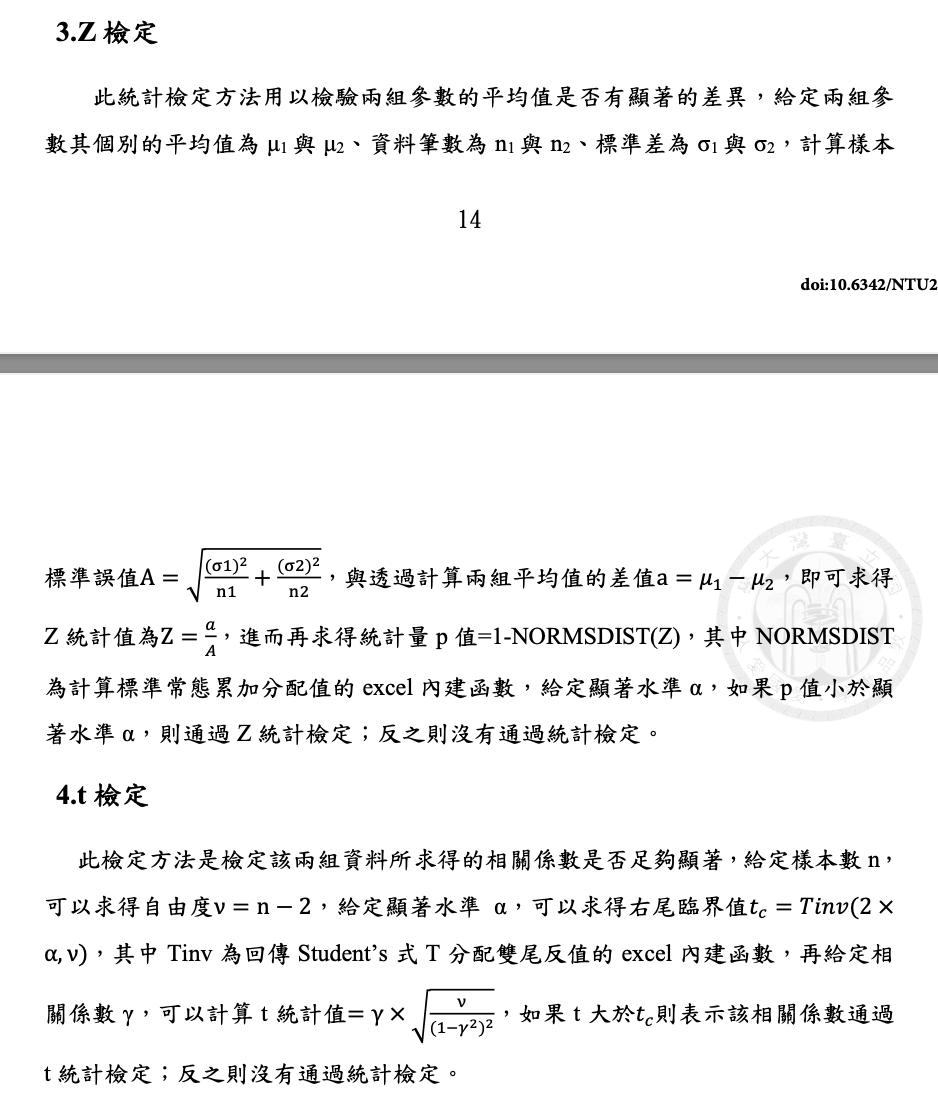